# Day or Night Classifier

The purpose of the project is to brush OpenCV basics in order to classify whether the given image is day or night. For the same purpose, we will be revising concepts of masking, threshold, change in intensity and finally writing a simple conditional classifier.

# Day and Night Image Classifier
---

The day/night image dataset consists of 200 RGB color images in two categories: day and night. There are equal numbers of each example: 100 day images and 100 night images.

We'd like to build a classifier that can accurately label these images as day or night, and that relies on finding distinguishing features between the two types of images!

*Note: All images come from the [AMOS dataset](http://cs.uky.edu/~jacobs/datasets/amos/) (Archive of Many Outdoor Scenes).*


In [1]:
import cv2 # computer vision library
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

## Training and Testing Data
The 200 day/night images are separated into training and testing datasets. 

* 60% of these images are training images, for you to use as you create a classifier.
* 40% are test images, which will be used to test the accuracy of your classifier.

First, we set some variables to keep track of some where our images are stored:

    image_dir_training: the directory where our training image data is stored
    image_dir_test: the directory where our test image data is stored

In [2]:
#Lets load the dataset
image_dir_training = "./day_night_images/training/"
image_dir_test = "day_night_images/test/"

In [3]:
print(image_dir_training)

./day_night_images/training/


## Load the datasets

These first few lines of code will load the training day/night images and store all of them in a variable, `IMAGE_LIST`. This list contains the images and their associated label ("day" or "night"). 


In [4]:
import os
import glob
def dataloader(img):
    im_list=[]
    image_types = ["day", "night"]
    for i in image_types:
        for file in glob.glob(os.path.join(img, i, "*")):
            # print(file)
            im = mpimg.imread(file)
            if not im is None:
                im_list.append((im, i))
    
    return im_list
Image_list=dataloader(image_dir_training)
len(Image_list)


240

# Visualizing the images 

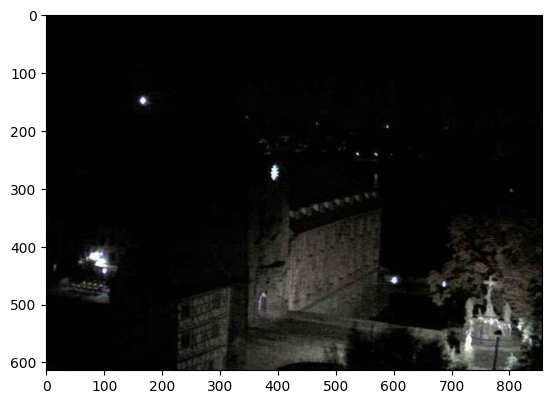

In [5]:
plt.imshow(Image_list[0][0])
plt.imshow(Image_list[140][0])

# Pre-process the Data

After loading in each image, you have to standardize the input and output. 
---
### Input

It's important to make all your images the same size so that they can be sent through the same pipeline of classification steps! Every input image should be in the same format, of the same size, and so on.

#### TODO: Standardize the input images

* Resize each image to the desired input size: 600x1100px (hxw).

In [6]:
def standard_input(image):
    
    standard_im = []        
    standard_im=cv2.resize(image,(1100,600))
    
    return standard_im

We see that the labels are in string format. In learning algorithms, its better we do encoding to make classification easier. Lets do a simple one hot encoding.

In [7]:
def one_hot_encoder(label):
    n_val=0
    if(label=='day'):
        n_val=1
    return n_val

## Construct a list of input images and output labels.

This function takes in a list of image-label pairs and outputs a **standardized** list of resized images and numerical labels.

This uses the functions you defined above to standardize the input and output, so those functions must be complete for this standardization to work!


In [8]:
def scaled(img_list):
    st_img=[]
    for i in img_list:
        img=i[0]
        label=i[1]
        std_im=standard_input(img)
        labels=one_hot_encoder(label)
        st_img.append((std_im,labels))
    return st_img

std_list=scaled(Image_list)
print(len(std_list))

240


In [9]:
print(std_list[0][0].shape)

(600, 1100, 3)


# Feature Extraction

Create a feature that represents the brightness in an image. We'll be extracting the **average brightness** using HSV colorspace. Specifically, we'll use the V channel (a measure of brightness), add up the pixel values in the V channel, then divide that sum by the area of the image to get the average Value of the image.

## RGB to HSV conversion to get Average Brightness

Below, a test image is converted from RGB to HSV colorspace and each component is displayed in an image. And get

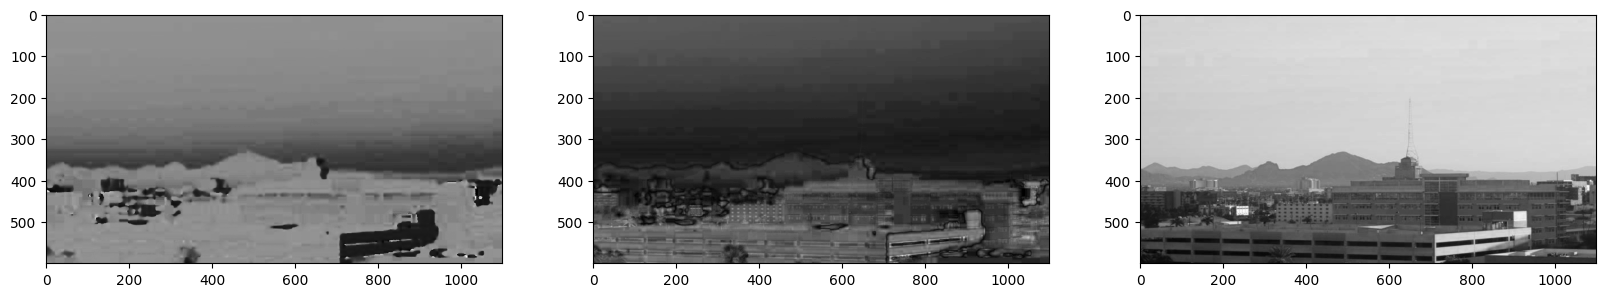

In [10]:
standard_image=standard_input(Image_list[0][0])
hsv=cv2.cvtColor(standard_image,cv2.COLOR_RGB2HSV)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.imshow(hsv[:,:,0],cmap='gray')
ax2.imshow(hsv[:,:,1],cmap='gray')
ax3.imshow(hsv[:,:,2],cmap='gray')

For a night image

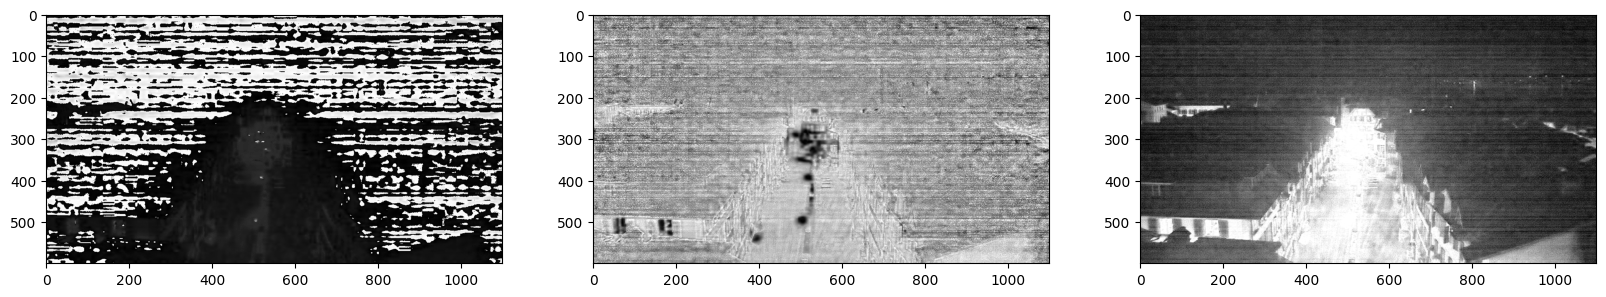

In [11]:
standard_image=standard_input(Image_list[212][0])
hsv=cv2.cvtColor(standard_image,cv2.COLOR_RGB2HSV)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.imshow(hsv[:,:,0],cmap='gray')
ax2.imshow(hsv[:,:,1],cmap='gray')
ax3.imshow(hsv[:,:,2],cmap='gray')

In [21]:
def brightness(image):
    #rgb to hsv
    rgb=cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    val_sum=np.sum(rgb[:,:,2])
    area=image.shape[0] *image.shape[1]
    avg_br=val_sum/area

    return avg_br
    

35.202807575757575


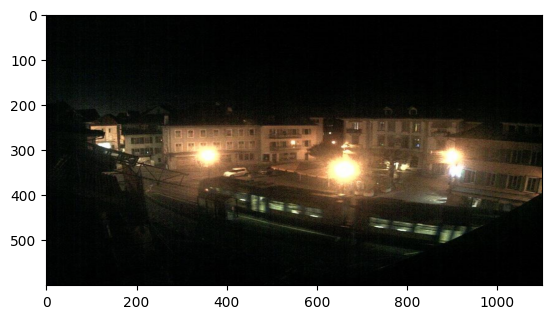

In [26]:
test=standard_input(Image_list[190][0])
print(brightness(test))
plt.imshow(test)

# Classification and Visualizing Error

In this section, we'll turn our average brightness feature into a classifier that takes in a standardized image and returns a `predicted_label` for that image. This `estimate_label` function should return a value: 0 or 1 (night or day, respectively).

In [65]:
def classifier(img):
    label=0
    #setting thresh as 101.75
    thresh=99.25
    avg=brightness(img)
    if(avg>thresh):
        label=1
    return label

1


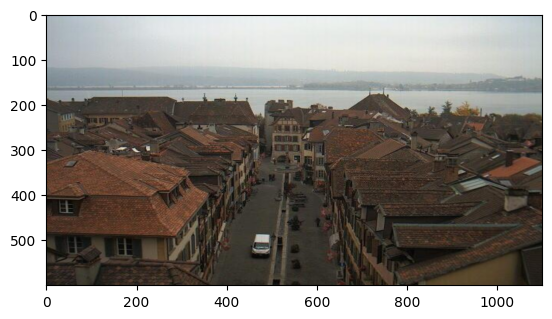

In [66]:
test=standard_input(Image_list[190][0])
print(classifier(test))
plt.imshow(test)

Getting accuracy

In [67]:
def mistakes(images):
    misclassified=[]
    for i in images:
        im=i[0]
        abel=i[1]
        pred=classifier(im)
        if(pred != abel):
            misclassified.append((im,pred,abel))
    # total=len(images)
    # correct=total-len(misclassified)
    # percent=correct/total
    return misclassified

On Test Set


In [68]:
Image_list_test=dataloader(image_dir_test)
standard_test=scaled(Image_list_test)
misc=mistakes(standard_test)
# misc=mistakes(Image_list)
total=len(Image_list_test)
correct=total-len(misc)
percent=correct/total
print("Accuracy",percent)
print("Misclassified Images count",len(misc))


Accuracy 0.93125
Misclassified Images count 11


Misclassfied Images

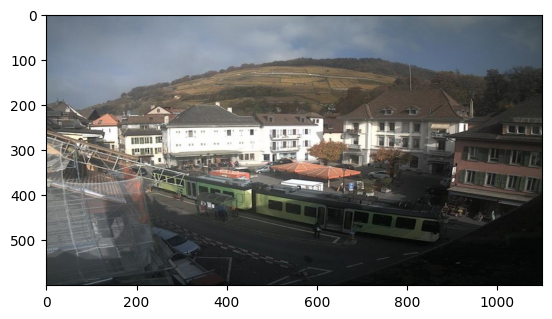

In [69]:
plt.imshow(misc[0][0])